In [25]:
import cv2
import numpy as np
import os
import h5py
import pandas as pd
from tensorflow.keras.models import Sequential
from keras.utils import np_utils
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img


In [26]:
train=pd.read_csv('train_new.csv')

In [27]:
train.head()

,image,class
0,Arson_frame0.jpg,Arson
1,Arson_frame100200.jpg,Arson
2,Arson_frame100500.jpg,Arson
3,Arson_frame100800.jpg,Arson
4,Arson_frame101100.jpg,Arson


In [28]:
from tensorflow.keras.preprocessing import image

In [29]:
train_image = []

for i in range(train.shape[0]):
    img = image.load_img('train_data/'+train['image'][i], target_size=(64,64,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)


In [30]:
X

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [31]:
len(X)

2511

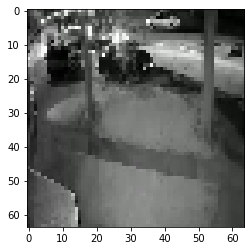

In [32]:
plt.imshow(X[9])

In [33]:
y=train['class']
y[1000]

'Burglary'

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [36]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [37]:
y_train.shape

(2008, 5)

In [39]:
y_train.head()


,Arson,Burglary,Explosion,Fighting,Normal
291,1,0,0,0,0
1743,0,0,1,0,0
1362,0,0,1,0,0
123,1,0,0,0,0
695,1,0,0,0,0


In [40]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2008, 64, 64, 3) (2008, 5) (503, 64, 64, 3) (503, 5)


In [41]:
# normalize data
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train


array([[[[0.0627451 , 0.0627451 , 0.0627451 ],
         [0.16078432, 0.16078432, 0.16078432],
         [0.21176471, 0.21960784, 0.20784314],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.02745098, 0.02745098, 0.02745098],
         [0.11764706, 0.11764706, 0.11764706],
         [0.22352941, 0.23137255, 0.21960784],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.14117648, 0.14117648, 0.14117648],
         [0.23921569, 0.24705882, 0.23529412],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.24705882, 0.24705882, 0.24705882],
         [0.3137255 , 0.3137255 , 0.3137255 ]

In [44]:
x_train /= 127.5
x_test /= 127.5
print(x_train)
print(x_test)

[[[[3.02725702e-08 3.02725702e-08 3.02725702e-08]
   [7.75734534e-08 7.75734534e-08 7.75734534e-08]
   [1.02169921e-07 1.05953987e-07 1.00277873e-07]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  [[1.32442484e-08 1.32442484e-08 1.32442484e-08]
   [5.67610634e-08 5.67610634e-08 5.67610634e-08]
   [1.07846020e-07 1.11630094e-07 1.05953987e-07]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [6.81132803e-08 6.81132803e-08 6.81132803e-08]
   [1.15414167e-07 1.19198234e-07 1.13522127e-07]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]]

  ...

  [[1.19198234e-07 1.19198234e-07 1.19198234e-07]
   [1.51362840e-

In [45]:
model = Sequential()

In [46]:
model.add(Conv2D(32, (3, 3),activation='relu', padding='same', input_shape=(64,64,3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

In [47]:
model.compile(
    loss= 'categorical_crossentropy', 
    optimizer=Adam(lr=0.001, decay=1e-04),
    metrics=['accuracy']
)

C:\Users\DESHIS\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 64)       

In [49]:
model.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=10,
    validation_data=(X_test, y_test),
    shuffle=True
)

Epoch 1/10
21/21 [==============================] - 6s 278ms/step - loss: 2.0541 - accuracy: 0.4268 - val_loss: 1.4825 - val_accuracy: 0.6163
Epoch 2/10
21/21 [==============================] - 6s 264ms/step - loss: 0.9448 - accuracy: 0.6310 - val_loss: 0.9841 - val_accuracy: 0.6680
Epoch 3/10
21/21 [==============================] - 6s 264ms/step - loss: 0.7156 - accuracy: 0.7375 - val_loss: 0.7865 - val_accuracy: 0.7515
Epoch 4/10
21/21 [==============================] - 6s 265ms/step - loss: 0.5673 - accuracy: 0.7893 - val_loss: 0.5702 - val_accuracy: 0.8191
Epoch 5/10
21/21 [==============================] - 6s 266ms/step - loss: 0.3953 - accuracy: 0.8501 - val_loss: 0.4543 - val_accuracy: 0.8807
Epoch 6/10
21/21 [==============================] - 6s 266ms/step - loss: 0.2906 - accuracy: 0.8909 - val_loss: 0.3202 - val_accuracy: 0.9185
Epoch 7/10
21/21 [==============================] - 6s 267ms/step - loss: 0.2300 - accuracy: 0.9178 - val_loss: 0.2531 - val_accuracy: 0.9384
Epoch 

In [50]:
y_pred = model.predict(X_test, batch_size=10, verbose=0)

In [51]:
y_pred

array([[8.6903596e-01, 1.8906547e-02, 7.6675072e-02, 3.4227740e-02,
        1.1547002e-03],
       [1.5024821e-03, 6.5198373e-03, 5.5512823e-03, 9.8636210e-01,
        6.4260239e-05],
       [6.1933865e-04, 2.8922427e-03, 3.1842627e-03, 9.9326843e-01,
        3.5724632e-05],
       ...,
       [3.8881854e-03, 8.6121500e-01, 4.1542146e-02, 9.3247816e-02,
        1.0691909e-04],
       [9.3876988e-05, 9.5987809e-07, 9.9990177e-01, 3.1451766e-06,
        1.9868669e-07],
       [2.9374746e-04, 3.1133331e-04, 1.5436180e-03, 9.9784458e-01,
        6.7586561e-06]], dtype=float32)

In [52]:
y_predict = []
for i in range(0, len(y_pred)):
    y_predict.append(int(np.argmax(y_pred[i])))
len(y_predict)
y_pred

array([[8.6903596e-01, 1.8906547e-02, 7.6675072e-02, 3.4227740e-02,
        1.1547002e-03],
       [1.5024821e-03, 6.5198373e-03, 5.5512823e-03, 9.8636210e-01,
        6.4260239e-05],
       [6.1933865e-04, 2.8922427e-03, 3.1842627e-03, 9.9326843e-01,
        3.5724632e-05],
       ...,
       [3.8881854e-03, 8.6121500e-01, 4.1542146e-02, 9.3247816e-02,
        1.0691909e-04],
       [9.3876988e-05, 9.5987809e-07, 9.9990177e-01, 3.1451766e-06,
        1.9868669e-07],
       [2.9374746e-04, 3.1133331e-04, 1.5436180e-03, 9.9784458e-01,
        6.7586561e-06]], dtype=float32)

In [53]:
y_test

,Arson,Burglary,Explosion,Fighting,Normal
443,1,0,0,0,0
2417,0,0,0,1,0
2404,0,0,0,1,0
1575,0,0,1,0,0
700,1,0,0,0,0
...,...,...,...,...,...
1623,0,0,1,0,0
554,1,0,0,0,0
1033,0,1,0,0,0
1421,0,0,1,0,0


In [54]:
y_true = []
y_test1 = np.array(y_test)
for i in range(0, len(y_test1)):
    y_true.append(int(np.argmax(y_test1[i])))
len(y_true)

503

In [55]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=45)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [56]:
class_names =['Arson','Burglary','Explosion','Fighting','Normal']

In [57]:
cm_plot_labels = class_names

In [58]:
l=len(y_true)
for i in range(l):
    print(y_true[i],'----',y_predict[i])

0 ---- 0
3 ---- 3
3 ---- 3
2 ---- 2
0 ---- 0
0 ---- 0
0 ---- 0
1 ---- 1
1 ---- 1
2 ---- 2
3 ---- 3
3 ---- 3
2 ---- 2
3 ---- 3
2 ---- 2
2 ---- 2
0 ---- 0
0 ---- 0
1 ---- 1
0 ---- 0
1 ---- 1
2 ---- 2
2 ---- 2
0 ---- 0
2 ---- 2
2 ---- 2
2 ---- 2
0 ---- 0
2 ---- 2
1 ---- 1
2 ---- 2
2 ---- 2
3 ---- 3
3 ---- 3
3 ---- 3
2 ---- 2
1 ---- 1
1 ---- 1
0 ---- 2
2 ---- 2
2 ---- 2
0 ---- 0
2 ---- 2
3 ---- 3
1 ---- 1
0 ---- 0
2 ---- 2
0 ---- 0
2 ---- 2
1 ---- 1
1 ---- 1
0 ---- 0
2 ---- 2
3 ---- 3
0 ---- 0
3 ---- 3
3 ---- 3
2 ---- 2
0 ---- 0
0 ---- 0
1 ---- 1
3 ---- 3
0 ---- 0
0 ---- 0
2 ---- 3
3 ---- 3
2 ---- 2
1 ---- 1
2 ---- 2
0 ---- 0
3 ---- 3
1 ---- 1
3 ---- 3
0 ---- 0
0 ---- 0
2 ---- 2
3 ---- 3
3 ---- 3
3 ---- 3
0 ---- 0
2 ---- 2
0 ---- 0
0 ---- 0
3 ---- 3
2 ---- 2
0 ---- 2
0 ---- 0
2 ---- 2
0 ---- 0
3 ---- 3
2 ---- 2
2 ---- 2
3 ---- 3
3 ---- 3
2 ---- 2
2 ---- 2
3 ---- 3
1 ---- 1
2 ---- 2
1 ---- 1
3 ---- 3
2 ---- 2
3 ---- 3
3 ---- 3
3 ---- 3
0 ---- 0
0 ---- 0
3 ---- 3
2 ---- 2
0 ---- 0
1 ---- 1
2

In [59]:
print(classification_report(y_true=y_true,y_pred=y_predict))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       142
           1       0.91      0.98      0.94        89
           2       0.95      0.96      0.96       141
           3       0.96      0.96      0.96       129
           4       1.00      1.00      1.00         2

    accuracy                           0.95       503
   macro avg       0.96      0.96      0.96       503
weighted avg       0.95      0.95      0.95       503



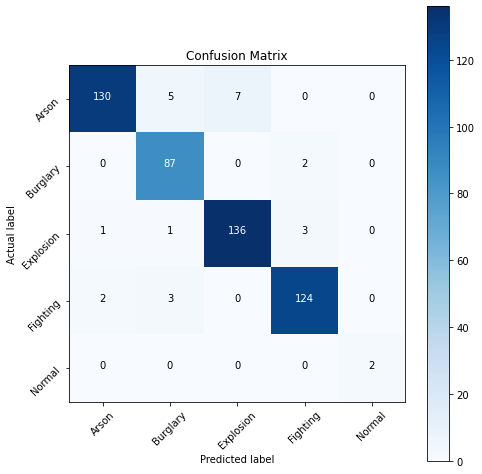

In [60]:
# to plot confusion matrix
cm = confusion_matrix(y_true=y_true, y_pred=y_predict)
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [61]:
acc_rf = accuracy_score(y_true=y_true, y_pred= y_predict)
print("Overall accuracy of CNN model using test-set is : %f" %(acc_rf*100))

Overall accuracy of CNN model using test-set is : 95.228628


In [62]:
model_structure = model.to_json()
f = Path("models/model_structure.json")
f.write_text(model_structure)

3276

In [63]:
model.save_weights("models/model_weights.h5")
model

# Thank You !